<a href="https://colab.research.google.com/github/soorajpazeekal/Predicting-early-signs-of-ASD/blob/main/aut_Disease_main_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/drive/MyDrive/autism_project/videos/.ipynb_checkpoints

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *installing and creating UI funcations here:*

In [ ]:
!pip install -q streamlit
!npm install localtunnel

     |████████████████████████████████| 9.2 MB 27.5 MB/s 
     |████████████████████████████████| 237 kB 67.6 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 164 kB 76.1 MB/s 
     |████████████████████████████████| 182 kB 59.9 MB/s 
     |████████████████████████████████| 4.7 MB 59.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.275s

3 packages are looking for funding
  run `npm fund` for details

f

In [ ]:
!streamlit run /content/drive/MyDrive/autism_project/app.py &>/dev/null&
!npx localtunnel --port 8501  --subdomain test826
#!pgrep streamlit

npx: installed 22 in 2.611s
your url is: https://test826.loca.lt




---



## This code section denotes for capturing each dynamic frames from a video file. frame count is random and according to testing its 10 frame images.

---



927.0


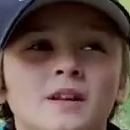

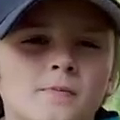

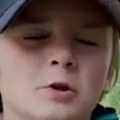

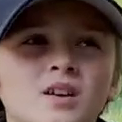

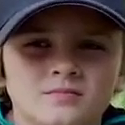

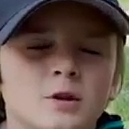

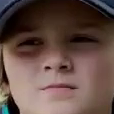

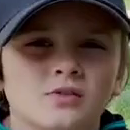

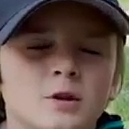

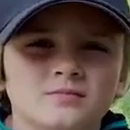

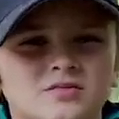

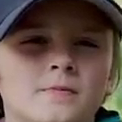

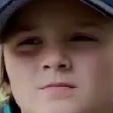

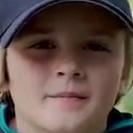

In [ ]:
import cv2
import os
import random
from google.colab.patches import cv2_imshow

model_to_img = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')


vid = cv2.VideoCapture('/content/drive/MyDrive/autism_project/VIDEO_c683eddf-7b2d-4c35-a2b7-e39f0685386a.mp4')


# get total number of frames
totalFrames = vid.get(cv2.CAP_PROP_FRAME_COUNT)
print(totalFrames)
if os.path.exists('data'):
  !rm -rf /content/data
if not os.path.exists('data'):
    os.makedirs('data')
for i in range(15):
  randomFrameNumber=random.randint(0, totalFrames)
# set frame position
  vid.set(cv2.CAP_PROP_POS_FRAMES,randomFrameNumber)
  success, image = vid.read()
  if success:
    #cv2.imwrite("random_frame_"+str(randomFrameNumber)+".jpg", image)
    face  = model_to_img.detectMultiScale(image)
    if len(face) == 0:
      print("no face")
    else:
      x1 = face[0][0]
      y1 = face[0][1]
      x2 = face[0][2] + x1
      y2 = face[0][3] + y1 
      crop_img = image[y1:y2 , x1:x2]         
      cv2_imshow(crop_img)
      cv2.imwrite("data/random_frame_"+str(randomFrameNumber)+".jpg",crop_img)
      path = "content/data"
      #cv2.imwrite(os.path.join(path , "random_frame_"+str(randomFrameNumber)+".jpg"), crop_img)


#####################################################################
# while True:
# face  = model.detectMultiScale(img)
# if len(face) == 0:
#   print("no face")
# else:
#   x1 = face[0][0]
#   y1 = face[0][1]
#   x2 = face[0][2] + x1
#   y2 = face[0][3] + y1 
#   crop_img = img[y1:y2 , x1:x2]         
#   cv2_imshow(crop_img)
#         # cv2.imshow("Orginal Video",img)
#         # if cv2.waitKey(100) == 13:
#         #     break
#   cv2.imwrite("crop_img.png",crop_img)

In [ ]:
#!pip install keras==2.8.0
#!pip install tensorflow==2.8.2

import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.8.0
2.8.2


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
len(os.listdir("/content/drive/MyDrive/autism_project/data/train"))

2

In [ ]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, 
                                   horizontal_flip= True,
                                   preprocessing_function= preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)


In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/autism_project/data/train", 
                                          target_size=(256,256), 
                                          batch_size= 3)

val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/autism_project/data/valid", 
                                          target_size=(256,256), 
                                          batch_size= 3)

Found 2654 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
t_image, label = train.next()

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

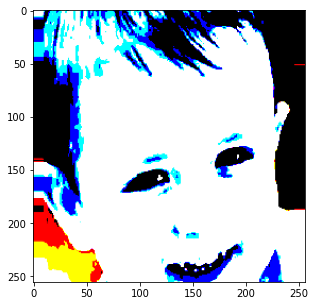

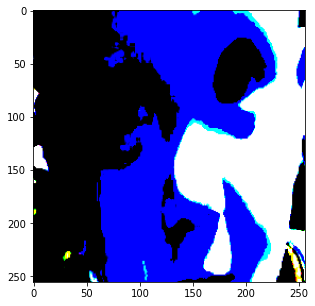

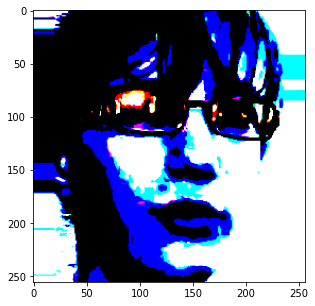

In [ ]:
plotImage(t_image[:3], label[:3])

## Core 

---



In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19

import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)

#Note: Dense unit must be same with target classes (folders) 

X = Dense(units= 2, activation='softmax')(X)


#Final Model
model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose= 1)

#Model check point

mc = ModelCheckpoint(filepath= 'best_model.h5', 
                     monitor= 'val_accuracy', 
                     min_delta= 0.01, patience= 3, 
                     verbose= 1, 
                     save_best_only= True)

cb = [es, mc]

In [ ]:
len(train) #batch_size
#len(val)

885

In [ ]:
his = model.fit(train, 
                steps_per_epoch= len(train),
                epochs= 100, 
                verbose= 1, 
                callbacks= cb, 
                validation_data= val, 
                validation_steps= len(val))

Epoch 1/100
885/885 [==============================] - ETA: 0s - loss: 17.2445 - accuracy: 0.6447
Epoch 1: val_accuracy improved from -inf to 0.78750, saving model to best_model.h5
885/885 [==============================] - 60s 68ms/step - loss: 17.2445 - accuracy: 0.6447 - val_loss: 9.2947 - val_accuracy: 0.7875
Epoch 2/100
885/885 [==============================] - ETA: 0s - loss: 19.0715 - accuracy: 0.7054
Epoch 2: val_accuracy improved from 0.78750 to 0.83750, saving model to best_model.h5
885/885 [==============================] - 58s 65ms/step - loss: 19.0715 - accuracy: 0.7054 - val_loss: 6.6987 - val_accuracy: 0.8375
Epoch 3/100
885/885 [==============================] - ETA: 0s - loss: 20.2218 - accuracy: 0.7136
Epoch 3: val_accuracy did not improve from 0.83750
885/885 [==============================] - 58s 65ms/step - loss: 20.2218 - accuracy: 0.7136 - val_loss: 9.3612 - val_accuracy: 0.8375
Epoch 4/100
885/885 [==============================] - ETA: 0s - loss: 18.7062 - acc

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

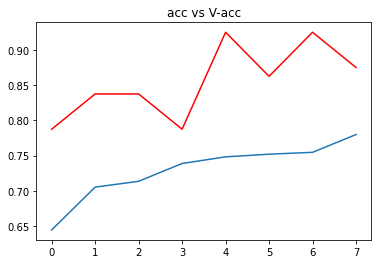

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs V-acc")
plt.show()

In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/autism_project/pretrained_models/best_model.h5")

acc = model.evaluate_generator(val)[1]
print(f"The accuracy of the model is = {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """


The accuracy of the model is = 87.5 %


In [ ]:
print(len(os.listdir("/content/data")))
list_pred = []
for item in os.listdir("/content/data"):
  print(item)
  img = load_img("/content/data/"+item, target_size= (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis= 0)
  pred = np.argmax(model.predict(img))
  print(f"model prediction is: {pred}")
  list_pred.append(pred)
list_pred  
print(f"Autistic: {list_pred.count(0)}, Non_Autistic: {list_pred.count(1)}")  
max(set(list_pred), key=list_pred.count)

FileNotFoundError: ignored

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# filename = next(iter(uploaded))
# path = "/content/"+filename
prediction(path = "/content/random_frame_549.jpg")

In [ ]:
train.class_indices